# Pitch extraction demo

Saraga dataset has 19 multi-track recordings of hindustani and carnatic concerts (with duration usually in the order of hours). The lead vocals melody extraction can be good approximation of ground truth for melody extraction from the mix. In this notebook we show how we can use **essentia** and **mir_eval** libraries to bootstrap pitch estimation experiment.

For this demo we only use two short audio files: mix and lead, which can be downloaded [here](https://drive.google.com/file/d/1B3MVAqF74O_TN1o5DjeaQpwBe5NG_G0B/view?usp=sharing)

In [1]:
import essentia.standard as ess
import matplotlib.pyplot as plt
import mir_eval
import numpy as np
import importlib
import os

# Repository files
import commons
import config

If you change repository files, run these line to reload

In [2]:
importlib.reload(commons)
importlib.reload(config)

<module 'config' from '/home/philtgun/Projects/mipfs-sumschool/config.py'>

If you extracted the data into `data` folder in the root, don't change the root_path, otherwise update it.

In [3]:
root_path = 'data'
mix_file = os.path.join(root_path, 'pitch', 'mix.mp3')
lead_file = os.path.join(root_path, 'pitch', 'lead.mp3')

### Load the files and plot audio signal

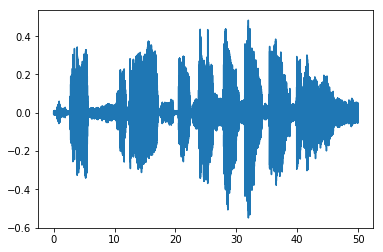

In [4]:
audio_mix = ess.MonoLoader(filename=mix_file)()
x = np.arange(len(audio_mix)) / config.SAMPLING_RATE
plt.plot(x, audio_mix)

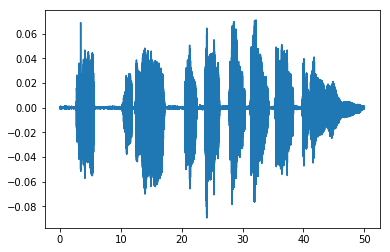

In [5]:
audio_lead = ess.MonoLoader(filename=lead_file)()
plt.plot(x, audio_lead) # files should be same in length

### Pitch visualization

`extract pitch` function includes equal loudness preprocessing that is good to have before pitch extraction. The algorithm used is [Melodia](https://essentia.upf.edu/documentation/reference/std_PitchMelodia.html)

In [6]:
pitch_mix, _ = commons.extract_pitch(audio_mix)
pitch_lead, _ = commons.extract_pitch(audio_lead)

In [7]:
time = np.arange(len(pitch_lead)) / config.SAMPLING_RATE * config.HOP_SIZE

#### From the mix

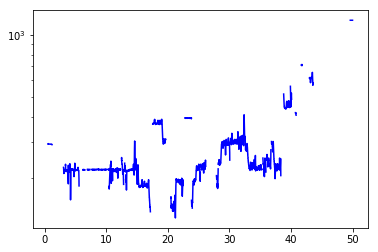

In [8]:
plt.semilogy(time, commons.get_plot_pitch(pitch_mix), 'b')

#### From the lead track

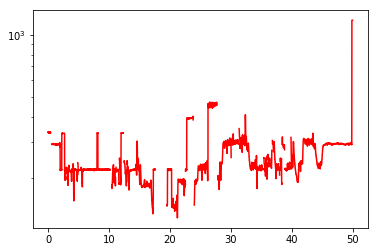

In [9]:
plt.semilogy(time, commons.get_plot_pitch(pitch_lead), 'r')

Now let's use `mir_eval` library to compute the pitch estimation accuracy

In [10]:
ref_voicing, ref_cent, est_voicing, est_cent = mir_eval.melody.to_cent_voicing(time, pitch_lead, time, pitch_mix)
mir_eval.melody.overall_accuracy(ref_voicing, ref_cent, est_voicing, est_cent)

0.5487578360807986

As you see, the accuracy is pretty low due to two factors: pitch extraction from lead audio is more detailed and has more information, and pitch tracks have no post-processing that will allow us to get rid of artifacts and improve the general quality of the pitch.

However this notebook can be used as a starting point for evaluating the pitch extraction algorithms, having a goal of trying to improve this accuracy.